<h1>IMPORTANDO AS BIBLIOTECAS QUE SERÃO USADAS NO PROJETO</h1>

In [125]:
#Celula contendo apenas as bibliotecas utilizadas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

In [126]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

<h1>ANALISAREMOS O GRUPO :  http://dados.ufrn.br/group/ensino </h1>

In [127]:
docentes_url = "http://dados.ufrn.br/dataset/8bf1a468-48ff-4f4d-95ee-b17b7a3a5592/resource/ff0a457e-76fa-4aca-ad99-48aebd7db070/download/docentes.csv"
docentes = pd.read_csv(docentes_url, sep=';')

avaliacao_docentes_url = 'http://dados.ufrn.br/dataset/d5723d75-7e6e-4264-82aa-b96909b69f63/resource/7accd1d2-2793-460e-b98d-87a0679b9155/download/avaliacaodocencia.csv'
avaliacao_docentes = pd.read_csv(avaliacao_docentes_url, sep=';')

In [128]:
docentes.rename(columns={'id_servidor': 'id_docente'}, inplace=True)

In [129]:
colunas = ['id_docente', 'lotacao', 'ano', 'postura_profissional_media', 'atuacao_profissional_media', 'autoavaliacao_aluno_media', 'admissao']

merge_docentes_avaliacao = pd.merge(docentes, avaliacao_docentes, on = 'id_docente')[colunas]

In [130]:
docentes_avaliacao_imd = merge_docentes_avaliacao[merge_docentes_avaliacao.lotacao == "INSTITUTO METROPOLE DIGITAL"]
docentes_avaliacao_imd.loc[:,'lotacao'] = "IMD"

docentes_avaliacao_dimap = merge_docentes_avaliacao[merge_docentes_avaliacao.lotacao == "DEPARTAMENTO DE INFORMÁTICA E MATEMÁTICA APLICADA"]
docentes_avaliacao_dimap.loc[:,'lotacao'] = "DIMAP"


In [131]:
#Avaliacoes 2013 DIMAP/IMD
#IMD
docentes_avaliacao_imd_2013 = docentes_avaliacao_imd[docentes_avaliacao_imd.ano == 2013]
docentes_avaliacao_imd_2013 = docentes_avaliacao_imd_2013[~docentes_avaliacao_imd_2013.id_docente.duplicated()]
#DIMAP
docentes_avaliacao_dimap_2013 = docentes_avaliacao_dimap[docentes_avaliacao_dimap.ano == 2013]
docentes_avaliacao_dimap_2013 = docentes_avaliacao_dimap_2013[~docentes_avaliacao_dimap_2013.id_docente.duplicated()]
#CONCATENANDO
avaliacoes_2013 = pd.concat([docentes_avaliacao_dimap_2013, docentes_avaliacao_imd_2013])

In [132]:
#Avaliacoes 2014 DIMAP/IMD
#IMD
docentes_avaliacao_imd_2014 = docentes_avaliacao_imd[docentes_avaliacao_imd.ano == 2014]
docentes_avaliacao_imd_2014 = docentes_avaliacao_imd_2014[~docentes_avaliacao_imd_2014.id_docente.duplicated()]
#DIMAP
docentes_avaliacao_dimap_2014 = docentes_avaliacao_dimap[docentes_avaliacao_dimap.ano == 2014]
docentes_avaliacao_dimap_2014 = docentes_avaliacao_dimap_2014[~docentes_avaliacao_dimap_2014.id_docente.duplicated()]
avaliacoes_2014 = pd.concat([docentes_avaliacao_dimap_2014, docentes_avaliacao_imd_2014])

In [133]:
#Avaliacoes 2015 DIMAP/IMD
#IMD
docentes_avaliacao_imd_2015 = docentes_avaliacao_imd[docentes_avaliacao_imd.ano == 2015]
docentes_avaliacao_imd_2015 = docentes_avaliacao_imd_2015[~docentes_avaliacao_imd_2015.id_docente.duplicated()]
#DIMAP
docentes_avaliacao_dimap_2015 = docentes_avaliacao_dimap[docentes_avaliacao_dimap.ano == 2015]
docentes_avaliacao_dimap_2015 = docentes_avaliacao_dimap_2015[~docentes_avaliacao_dimap_2015.id_docente.duplicated()]
#CONCATENANDO
avaliacoes_2015 = pd.concat([docentes_avaliacao_dimap_2015, docentes_avaliacao_imd_2015])

In [134]:
#Avaliacoes 2016 DIMAP/IMD
#IMD
docentes_avaliacao_imd_2016 = docentes_avaliacao_imd[docentes_avaliacao_imd.ano == 2016]
docentes_avaliacao_imd_2016 = docentes_avaliacao_imd_2016[~docentes_avaliacao_imd_2016.id_docente.duplicated()]
#DIMAP
docentes_avaliacao_dimap_2016 = docentes_avaliacao_dimap[docentes_avaliacao_dimap.ano == 2016]
docentes_avaliacao_dimap_2016 = docentes_avaliacao_dimap_2016[~docentes_avaliacao_dimap_2016.id_docente.duplicated()]
#CONCATENANDO
avaliacoes_2016 = pd.concat([docentes_avaliacao_dimap_2016, docentes_avaliacao_imd_2016])

In [135]:
#Avaliacoes 2017 DIMAP/IMD
#IMD
docentes_avaliacao_imd_2017 = docentes_avaliacao_imd[docentes_avaliacao_imd.ano == 2017]
docentes_avaliacao_imd_2017 = docentes_avaliacao_imd_2017[~docentes_avaliacao_imd_2017.id_docente.duplicated()]
#DIMAP
docentes_avaliacao_dimap_2017 = docentes_avaliacao_dimap[docentes_avaliacao_dimap.ano == 2017]
docentes_avaliacao_dimap_2017 = docentes_avaliacao_dimap_2017[~docentes_avaliacao_dimap_2017.id_docente.duplicated()]
#CONCATENANDO
avaliacoes_2017 = pd.concat([docentes_avaliacao_dimap_2017, docentes_avaliacao_imd_2017])

### Análise da avaliações do IMD

In [136]:
admissao_ano_imd = []
docentes_avaliacao_imd.admissao = docentes_avaliacao_imd.admissao.astype(str)

for index, value in enumerate(docentes_avaliacao_imd.admissao):
    dt = value[:4]
    admissao_ano_imd.append(dt)

admissao_ano_imd = list(map(int, admissao_ano_imd))

docentes_avaliacao_imd.admissao = admissao_ano_imd

docentes_avaliacao_media_imd = docentes_avaliacao_imd.pivot_table(index=["ano", "admissao"],
                 values=["postura_profissional_media","atuacao_profissional_media", "autoavaliacao_aluno_media"],
                 aggfunc=np.mean)

docentes_avaliacao_media_imd_2013 = docentes_avaliacao_media_imd.loc[2013, ["postura_profissional_media",
                                                                                "atuacao_profissional_media",
                                                                                "autoavaliacao_aluno_media"]]

docentes_avaliacao_media_imd_2014 = docentes_avaliacao_media_imd.loc[2014, ["postura_profissional_media",
                                                                                "atuacao_profissional_media", 
                                                                                "autoavaliacao_aluno_media"]]

docentes_avaliacao_media_imd_2015 = docentes_avaliacao_media_imd.loc[2015, ["postura_profissional_media",
                                                                                "atuacao_profissional_media",
                                                                                "autoavaliacao_aluno_media"]]

docentes_avaliacao_media_imd_2016 = docentes_avaliacao_media_imd.loc[2016, ["postura_profissional_media",
                                                                                "atuacao_profissional_media", 
                                                                                "autoavaliacao_aluno_media"]]

docentes_avaliacao_media_imd_2017 = docentes_avaliacao_media_imd.loc[2017, ["postura_profissional_media",
                                                                                "atuacao_profissional_media",
                                                                                "autoavaliacao_aluno_media"]]

In [137]:
docentes_avaliacao_media_imd_2013["admissao"] = docentes_avaliacao_media_imd_2013.index
docentes_avaliacao_media_imd_2014["admissao"] = docentes_avaliacao_media_imd_2014.index
docentes_avaliacao_media_imd_2015["admissao"] = docentes_avaliacao_media_imd_2015.index
docentes_avaliacao_media_imd_2016["admissao"] = docentes_avaliacao_media_imd_2016.index
docentes_avaliacao_media_imd_2017["admissao"] = docentes_avaliacao_media_imd_2017.index

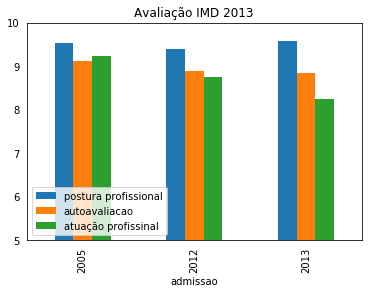

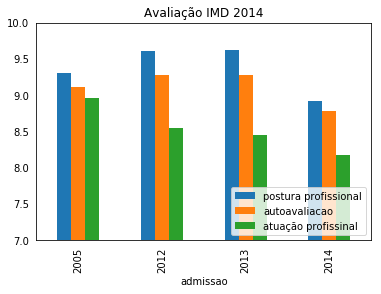

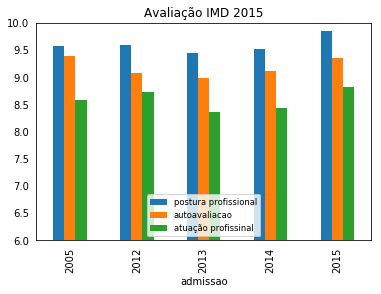

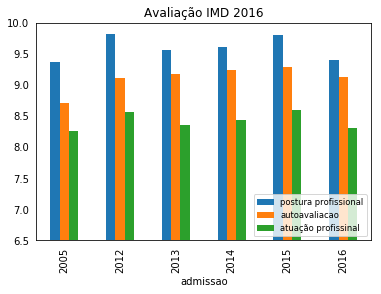

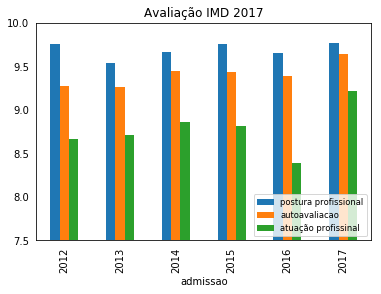

In [138]:
ax1 = docentes_avaliacao_media_imd_2013.plot(kind="bar",y=["postura_profissional_media","atuacao_profissional_media", "autoavaliacao_aluno_media"],
                                             title="Avaliação IMD 2013")
ax1.set_ylim(5,10)
ax1.tick_params(bottom="off", top="off", left="off", right="off")
ax1.legend(loc=3, labels=['postura profissional', 'autoavaliacao', 'atuação profissinal'])


ax2 = docentes_avaliacao_media_imd_2014.plot(kind='bar',y=["postura_profissional_media","atuacao_profissional_media", "autoavaliacao_aluno_media"],
                                             title='Avaliação IMD 2014')
ax2.set_ylim(7,10)
ax2.tick_params(bottom="off", top="off", left="off", right="off")
ax2.legend(loc=4, labels=['postura profissional', 'autoavaliacao', 'atuação profissinal'])


ax3 = docentes_avaliacao_media_imd_2015.plot(kind='bar',y=["postura_profissional_media","atuacao_profissional_media", "autoavaliacao_aluno_media"],
                                title='Avaliação IMD 2015')
ax3.set_ylim(6,10)
ax3.tick_params(bottom="off", top="off", left="off", right="off")
ax3.legend(loc='lower center', labels=['postura profissional', 'autoavaliacao', 'atuação profissinal'], fontsize="small")


ax4 = docentes_avaliacao_media_imd_2016.plot(kind='bar',y=["postura_profissional_media","atuacao_profissional_media", "autoavaliacao_aluno_media"],
                                title='Avaliação IMD 2016')
ax4.set_ylim(6.5,10)
ax4.tick_params(bottom="off", top="off", left="off", right="off")
ax4.legend(loc=4, labels=['postura profissional', 'autoavaliacao', 'atuação profissinal'], fontsize="small")


ax5 = docentes_avaliacao_media_imd_2017.plot(kind='bar',y=["postura_profissional_media","atuacao_profissional_media", "autoavaliacao_aluno_media"],
                                title='Avaliação IMD 2017')
ax5.set_ylim(7.5,10)
ax5.tick_params(bottom="off", top="off", left="off", right="off")
ax5.legend(loc=4, labels=['postura profissional', 'autoavaliacao', 'atuação profissinal'], fontsize="small")

plt.show()

### Análise dos dados do DIMAP

In [139]:
admissao_ano_dimap = []

docentes_avaliacao_dimap.admissao = docentes_avaliacao_dimap.admissao.astype(str)

for index, value in enumerate(docentes_avaliacao_dimap.admissao):
    dt = value[:4]
    admissao_ano_dimap.append(dt)

admissao_ano_dimap = list(map(int, admissao_ano_dimap))

docentes_avaliacao_dimap.admissao = admissao_ano_dimap

docentes_avaliacao_media_dimap = docentes_avaliacao_dimap.pivot_table(index=["ano", "admissao"],
                 values=["postura_profissional_media","atuacao_profissional_media", "autoavaliacao_aluno_media"],
                 aggfunc=np.mean)


In [140]:
docentes_avaliacao_media_dimap_2013 = docentes_avaliacao_media_dimap.loc[2013, ["postura_profissional_media",
                                                                                "atuacao_profissional_media",
                                                                                "autoavaliacao_aluno_media"]]

docentes_avaliacao_media_dimap_2014 = docentes_avaliacao_media_dimap.loc[2014, ["postura_profissional_media",
                                                                                "atuacao_profissional_media", 
                                                                                "autoavaliacao_aluno_media"]]

docentes_avaliacao_media_dimap_2015 = docentes_avaliacao_media_dimap.loc[2015, ["postura_profissional_media",
                                                                                "atuacao_profissional_media",
                                                                                "autoavaliacao_aluno_media"]]

docentes_avaliacao_media_dimap_2016 = docentes_avaliacao_media_dimap.loc[2016, ["postura_profissional_media",
                                                                                "atuacao_profissional_media", 
                                                                                "autoavaliacao_aluno_media"]]

docentes_avaliacao_media_dimap_2017 = docentes_avaliacao_media_dimap.loc[2017, ["postura_profissional_media",
                                                                                "atuacao_profissional_media",
                                                                                "autoavaliacao_aluno_media"]]

In [141]:
docentes_avaliacao_media_dimap_2013["admissao"] = docentes_avaliacao_media_dimap_2013.index
docentes_avaliacao_media_dimap_2014["admissao"] = docentes_avaliacao_media_dimap_2014.index
docentes_avaliacao_media_dimap_2015["admissao"] = docentes_avaliacao_media_dimap_2015.index
docentes_avaliacao_media_dimap_2016["admissao"] = docentes_avaliacao_media_dimap_2016.index
docentes_avaliacao_media_dimap_2017["admissao"] = docentes_avaliacao_media_dimap_2017.index

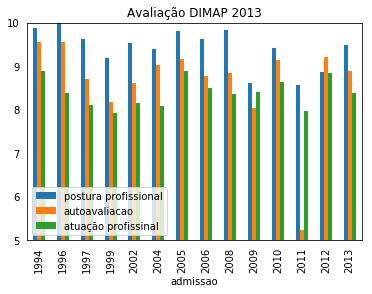

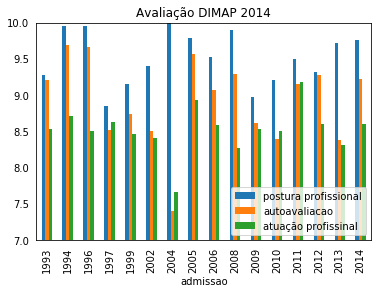

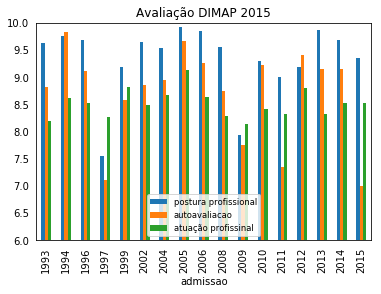

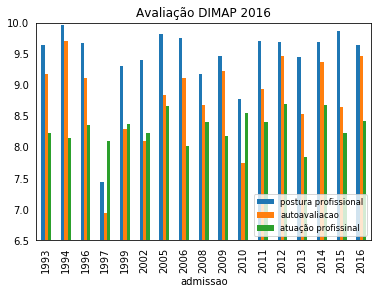

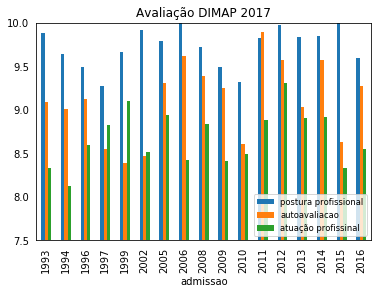

In [142]:
ax1 = docentes_avaliacao_media_dimap_2013.plot(kind="bar",y=["postura_profissional_media","atuacao_profissional_media", "autoavaliacao_aluno_media"], title="Avaliação DIMAP 2013")
ax1.set_ylim(5,10)
ax1.tick_params(bottom="off", top="off", left="off", right="off")
ax1.legend(loc=3, labels=['postura profissional', 'autoavaliacao', 'atuação profissinal'])


ax2 = docentes_avaliacao_media_dimap_2014.plot(kind='bar',y=["postura_profissional_media","atuacao_profissional_media", "autoavaliacao_aluno_media"], title='Avaliação DIMAP 2014')
ax2.set_ylim(7,10)
ax2.tick_params(bottom="off", top="off", left="off", right="off")
ax2.legend(loc=4, labels=['postura profissional', 'autoavaliacao', 'atuação profissinal'])


ax3 = docentes_avaliacao_media_dimap_2015.plot(kind='bar',y=["postura_profissional_media","atuacao_profissional_media", "autoavaliacao_aluno_media"],
                                title='Avaliação DIMAP 2015')
ax3.set_ylim(6,10)
ax3.tick_params(bottom="off", top="off", left="off", right="off")
ax3.legend(loc='lower center', labels=['postura profissional', 'autoavaliacao', 'atuação profissinal'], fontsize="small")


ax4 = docentes_avaliacao_media_dimap_2016.plot(kind='bar',y=["postura_profissional_media","atuacao_profissional_media", "autoavaliacao_aluno_media"],
                                title='Avaliação DIMAP 2016')
ax4.set_ylim(6.5,10)
ax4.tick_params(bottom="off", top="off", left="off", right="off")
ax4.legend(loc=4, labels=['postura profissional', 'autoavaliacao', 'atuação profissinal'], fontsize="small")


ax5 = docentes_avaliacao_media_dimap_2017.plot(kind='bar',y=["postura_profissional_media","atuacao_profissional_media", "autoavaliacao_aluno_media"],
                                title='Avaliação DIMAP 2017')
ax5.set_ylim(7.5,10)
ax5.tick_params(bottom="off", top="off", left="off", right="off")
ax5.legend(loc=4, labels=['postura profissional', 'autoavaliacao', 'atuação profissinal'], fontsize="small")

plt.show()

In [143]:
avaliacoes_dimap = pd.concat([docentes_avaliacao_dimap_2013,docentes_avaliacao_dimap_2014,docentes_avaliacao_dimap_2015,docentes_avaliacao_dimap_2016,docentes_avaliacao_dimap_2017])
avaliacoes_imd = pd.concat([docentes_avaliacao_imd_2013,docentes_avaliacao_imd_2014,docentes_avaliacao_imd_2015,docentes_avaliacao_imd_2016,docentes_avaliacao_imd_2017])

avaliacoes = pd.concat([avaliacoes_dimap,avaliacoes_imd])

In [144]:
avaliacoes_dimap_media = avaliacoes_dimap.pivot_table(index="ano",
                 values=["postura_profissional_media","atuacao_profissional_media", "autoavaliacao_aluno_media"],
                 aggfunc=np.mean)
anos= [2013,2014,2015,2016,2017]
avaliacoes_dimap_media['ano'] = anos
avaliacoes_dimap_media.rename(columns={'postura_profissional_media': 'postura_profissional_media_dimap',
                                 'autoavaliacao_aluno_media' : 'autoavaliacao_aluno_media_dimap', 
                                 'atuacao_profissional_media' : 'atuacao_profissional_media_dimap'}, inplace=True)

In [145]:
avaliacoes_imd_media = avaliacoes_imd.pivot_table(index="ano",
                 values=["postura_profissional_media","atuacao_profissional_media", "autoavaliacao_aluno_media"],
                 aggfunc=np.mean)
anos= [2013,2014,2015,2016,2017]
avaliacoes_imd_media['ano'] = anos
avaliacoes_imd_media.rename(columns={'postura_profissional_media': 'postura_profissional_media_imd',
                                 'autoavaliacao_aluno_media' : 'autoavaliacao_aluno_media_imd', 
                                 'atuacao_profissional_media' : 'atuacao_profissional_media_imd'}, inplace=True)

In [146]:
avaliacoes_medias = pd.merge(avaliacoes_imd_media, avaliacoes_dimap_media)
avaliacoes_medias

,atuacao_profissional_media_imd,autoavaliacao_aluno_media_imd,postura_profissional_media_imd,ano,atuacao_profissional_media_dimap,autoavaliacao_aluno_media_dimap,postura_profissional_media_dimap
0,8.945556,8.494444,9.571111,2013,8.678800,8.446800,9.376800
1,9.236842,8.531053,9.593158,2014,8.860000,8.432813,9.485312
2,9.060000,8.508387,9.647097,2015,8.781786,8.414286,9.328214
3,9.141515,8.446667,9.594848,2016,8.692333,8.450000,9.424000
4,9.398000,8.754333,9.688667,2017,9.251786,8.733929,9.716429


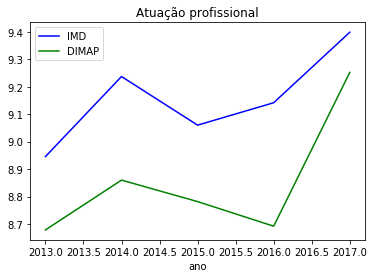

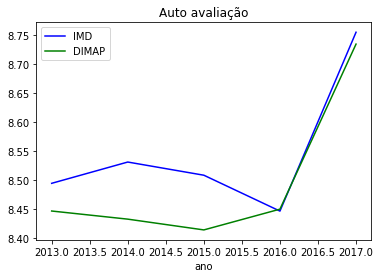

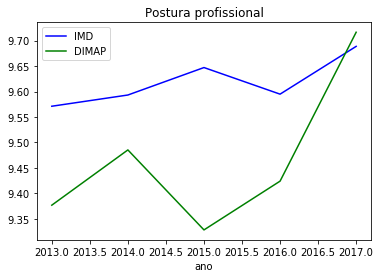

In [147]:
axe1 = avaliacoes_medias.plot(kind='line',x='ano',y=["atuacao_profissional_media_imd", "atuacao_profissional_media_dimap"],
                                title='Atuação profissional',
                                color=['blue', 'green']).\
                                    legend(loc='best',
                               labels=['IMD','DIMAP'])
    
avaliacoes_medias.plot(kind='line',x='ano',y=["autoavaliacao_aluno_media_imd", "autoavaliacao_aluno_media_dimap"],
                   title='Auto avaliação',
                   color=['blue', 'green']).\
                        legend(loc='best',
                               labels=['IMD','DIMAP'])
avaliacoes_medias.plot(kind='line',x='ano',y=["postura_profissional_media_imd", "postura_profissional_media_dimap"],
                   title='Postura profissional',
                   color=['blue', 'green']).\
                        legend(loc='best',
                               labels=['IMD','DIMAP'])